In [40]:
import epd as epd_test

In [2]:
import pandas as pd
import numpy as np

In [3]:
feature_matrix_file = "rt15s/191017USXP001_PN.feature_matrix.csv"

In [4]:
feature_matrix_df = pd.read_csv(feature_matrix_file)

In [5]:
feature_matrix_df

feature_id  charge          RT           mz     RTstart  \
0     15442117177793273938       0    2.884946   100.003137    0.275567   
1     12830683088184381947       0   59.232511   100.039363   53.287756   
2     13264828442905664249       0  989.575800   100.904039  984.802560   
3     12680835294601837784       0  979.062180   100.904241  943.080240   
4      5715956394182736751       0  998.460600   100.906099  776.664540   
...                    ...     ...         ...          ...         ...   
7501  13604236055833466033       0  723.699360  1437.804774  721.928340   
7502  14418602174490107004       0   59.544765  1459.447702   56.108257   
7503  11340171020803744738       0   58.920511  1459.948574   55.795883   
7504    921404841096517827       0   58.920511  1460.449431   55.483632   
7505   1563772892460901741       0   59.857262  1497.395452   55.795883   

            RTend      MZstart        MZend   quality  intensity  \
0       36.282364   100.002914   100.003242  0.000061  471916.40   
1       77.247918   100.039154   100.039566  0.000016  120929.70   
2      993.070440   100.902847   100.904999  0.000006   43356.17   
3      984.165960   100.902817   100.905205  0.000005   37592.23   
4     1080.252420   100.905174   100.907028  0.000018  135651.60   
...           ...          ...          ...       ...        ...   
7501   727.897380  1437.786865  1437.824829  0.000004   27253.03   
7502    68.004156  1459.442261  1459.453247  0.000042  324815.60   
7503    68.004156  1459.938232  1459.955688  0.000029  223303.20   
7504    65.805270  1460.439087  1460.462769  0.000025  191107.30   
7505    62.670642  1497.390625  1497.398193  0.000019  149610.40   

      num_of_masstraces       FWHM  \
0                     1  35.004154   
1                     1  15.274867   
2                     1   8.267880   
3                     1  41.085720   
4                     1  36.644836   
...                 ...        ...   
7501                  1   5.969040   
7502                  1   7.542980   
7503                  1  10.730602   
7504                  1  10.321638   
7505                  1   6.874759   

                                               chrom_RT  \
0     0.275566974,0.6895669799999999,1.05356496,1.42...   
1     53.287755600000004,53.9178792,54.2316378,54.54...   
2     984.80256,985.12146,986.0766600000001,987.9869...   
3     943.08024,943.40016,944.36028,944.68062,945.98...   
4     776.66454,776.99328,777.97368,778.95906,780.63...   
...                                                 ...   
7501  721.92834,722.99322,723.69936,724.05036,724.75...   
7502  56.1082572,56.733637800000004,57.046134,57.358...   
7503  55.7958828,56.1082572,56.4210078,56.7336378000...   
7504  55.483632,55.7958828,56.733637800000004,57.046...   
7505  55.7958828,56.4210078,56.733637800000004,57.04...   

                                        chrom_intensity  \
0     353558.0,508494.53,446912.44,452386.03,419858....   
1     54958.05,83666.45,73090.266,70617.26,82217.2,8...   
2     40465.18,27249.219,22746.975,31935.889,55118.1...   
3     21494.09,31613.24,36039.883,30206.191,21463.64...   
4     13993.758,11871.68,13727.4,11118.821,14890.612...   
...                                                 ...   
7501  21012.44,16558.312,45543.67,15097.457,28823.49...   
7502  242192.45,211165.66,98296.06,144962.72,212659....   
7503  237845.19,135666.28,127189.81,177601.44,213939...   
7504  166590.19,204441.8,160933.55,142230.27,177095....   
7505  164068.19,129132.77,115564.15,108961.53,99708....   

                                                 EIC_RT  \
0     0.275566974,0.6895669799999999,1.05356496,1.42...   
1     44.5473708,44.8727466,45.2002482,45.526122,45....   
2     974.5781999999999,974.8983,975.2195399999999,9...   
3     964.28544,964.6077600000001,964.9279200000001,...   
4     983.52918,983.84706,984.16596,984.48444,984.80...   
...                                                 ...   
7501  708.

In [6]:
feature_matrix_df.columns[15]

'EIC_intensity'

In [59]:
rts = [ float(i) for i in feature_matrix_df[feature_matrix_df["feature_id"] == 3909066037551041226].iloc[0,14].split(",") ]
intys = [ float(i) for i in feature_matrix_df[feature_matrix_df["feature_id"] == 3909066037551041226].iloc[0,15].split(",") ]

In [41]:
elution_peak_detection = epd_test.ElutionPeakDetection()
intensities = intys
win_size = 11

# Smooth data
smoothed_intensities = elution_peak_detection.smooth_data(intensities, win_size)
# Find local extrema
chrom_maxes, chrom_mins = elution_peak_detection.find_local_extrema(smoothed_intensities, win_size // 2)

In [42]:
chrom_maxes

[16, 26, 36, 47]

In [43]:
chrom_mins

[20, 30, 39]

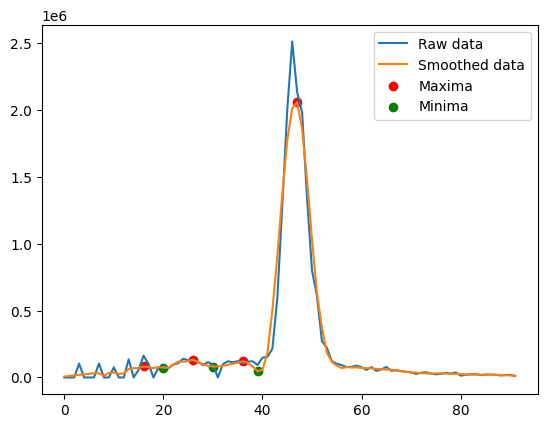

In [44]:
import matplotlib.pyplot as plt
plt.plot(intensities, label='Raw data')
plt.plot(smoothed_intensities, label='Smoothed data')
plt.scatter(chrom_maxes, [smoothed_intensities[i] for i in chrom_maxes], color='red', label='Maxima')
plt.scatter(chrom_mins, [smoothed_intensities[i] for i in chrom_mins], color='green', label='Minima')
plt.legend()
plt.show()

In [15]:
feature_matrix_test_df = feature_matrix_df.copy()

In [17]:
feature_matrix_test_df.sort_values("FWHM", ascending=False)

feature_id  charge          RT          mz     RTstart  \
6321   8931769427241409346       0  941.481600  432.234232  924.856740   
2576   8480022353156593559       0  939.245520  209.047058  918.811740   
3733  13890898435766499632       0  199.049694  255.822970  194.161686   
3622   3676020661452147480       0  876.110940  250.888175  854.556540   
6542   2400572962512747488       0  832.349640  464.710975  791.546460   
...                    ...     ...         ...         ...         ...   
7222   3190881121408810076       0   37.562745  650.499878   36.921870   
6610   6799134604668677090       0   36.282364  474.843612   32.464482   
7129   1036135662382985345       0   37.879484  608.515315   36.921870   
3398  16324561998397643183       0   33.434617  240.928590   31.828108   
3526  11043774169668464857       0   28.462347  246.943019   25.492101   

           RTend     MZstart       MZend   quality   intensity  \
6321  984.802560  432.232178  432.235382  0.000008    62835.84   
2576  978.742080  209.046051  209.047516  0.000005    40412.20   
3733  552.570648  255.822586  255.823334  0.000017   131663.20   
3622  914.358480  250.887512  250.888809  0.000005    35098.37   
6542  851.329260  464.709106  464.713318  0.000003    26360.20   
...          ...         ...         ...       ...         ...   
7222   42.932122  650.497375  650.500793  0.000036   280623.10   
6610   36.921870  474.843201  474.849579  0.000157  1210122.00   
7129   43.897991  608.512817  608.517029  0.000040   310051.30   
3398   34.391485  240.928299  240.929184  0.000038   293458.50   
3526   30.552479  246.941727  246.945175  0.000003    24418.62   

      num_of_masstraces       FWHM  \
6321                  1  59.945820   
2576                  1  59.930340   
3733                  1  59.832367   
3622                  1  59.801940   
6542                  1  59.782800   
...                 ...        ...   
7222                  1   1.593306   
6610                  1   1.556095   
7129                  1   1.491392   
3398                  1   1.209395   
3526                  1   1.144157   

                                               chrom_RT  \
6321  924.8567400000001,925.4946,926.13174,927.72462...   
2576  918.8117400000001,919.4481,919.76634,921.03870...   
3733  194.161686,194.534562,196.38831599999997,196.7...   
3622  854.55654,854.88252,855.2085,855.5349,855.8620...   
6542  791.54646,793.19358,793.5226799999999,794.8408...   
...                                                 ...   
7222  36.92187,37.2449898,37.562745,37.8794838,38.19...   
6610  32.464482000000004,32.7847398,33.7567422,35.33...   
7129  36.92187,37.2449898,37.562745,37.8794838,38.19...   
3398  31.8281082,32.464482000000004,32.7847398,33.10...   
3526  25.492101,26.6074752,26.9782278,27.3493608,27....   

                                        chrom_intensity  \
6321  40213.406,34775.336,38209.85,42357.434,44200.8...   
2576  38559.113,29457.44,31885.588,35669.637,45773.0...   
3733  27108.688,14377.486,21070.52,32895.117,78625.0...   
3622  23784.18,41338.65,23156.12,43895.79,33314.934,...   
6542  18506.184,12800.242,14388.471,22036.629,14202....   
...                                                 ...   
7222  36774.547,363721.97,527234.1,375539.25,176250....   
6610  42931.555,44051.08,25745.031,128177.07,780346....   
7129  43849.59,253894.1,344712.34,417012.2,304548.03...   
3398  43473.766,36947.676,51500.66,340382.38,413881....   
3526  11643.828,11226.379,10630.532,10348.0205,12105...   

                                                 EIC_RT  \
6321  926.7688800000001,927.0876000000001,927.40584,...   
2576  924.53862,924.8567400000001,925.17576,925.4946...   
3733  184.074174,184.45067999999998,184.829808,185.2...   
3622  861.42204,861.75018,862.0779,862.40454,862.731...   
6542  817.59,817.91712,818.24508,818.5734600000001,8...   
...                                                 ...   
7222  22.8947262,23.264847,23.6333532,24.00009

In [25]:
feature_matrix_test_df[feature_matrix_test_df["FWHM"] >= 50][["feature_id"]].to_csv("FWHM.50.csv", index = False)

In [41]:
import scipy.stats
pearson_corr, _ = scipy.stats.pearsonr(intensities, smoothed_intensities)
print(f"Pearson correlation coefficient: {pearson_corr}")
if pearson_corr > 0.8:
    print("True positive peaks")
else:
    print("Noise")

Pearson correlation coefficient: 0.8423860448976455
True positive peaks


In [54]:
import numpy as np

def calculate_peak_entropy(peak_data, eic):
    """
    Calculate the entropy of each peak.
    
    Parameters:
    peak_data (numpy.ndarray): A 2D array where each row contains the peak start index, maximum point index, and end index.
    eic (numpy.ndarray): A 1D array representing the extracted ion chromatogram.
    
    Returns:
    numpy.ndarray: A 1D array containing the entropy of each peak.
    """
    D = np.diff(eic)
    print("D", D)
    p = np.zeros(peak_data.shape[0])
    print("p", p)
    
    for n in range(peak_data.shape[0]):
        peak = D[peak_data[n, 1]:peak_data[n, 2]]
        print("peak", peak)
        maxidx = peak_data[n, 0] - peak_data[n, 1]
        print("maxidx", maxidx)
        
        premax = peak[:maxidx] < 0
        print("premax", premax)
        postmax = peak[maxidx+1:] > 0
        print("postmax", postmax)
        
        var_points = np.concatenate((premax, [False], postmax))
        print("var_points", var_points)
        p[n] = np.sum(var_points) / var_points.size
        print("p", p)
    
    peak_entropy = -p * np.log2(p) - (1 - p) * np.log2(1 - p)
    peak_entropy[np.isnan(peak_entropy)] = 0
    
    return peak_entropy

# Example usage:
peak_data = np.array([
    [5, 2, 8],
    [10, 7, 12]
])
eic = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

entropy = calculate_peak_entropy(peak_data, eic)
print(entropy)

D [1 1 1 1 1 1 1 1 1 1 1 1]
p [0. 0.]
peak [1 1 1 1 1 1]
maxidx 3
premax [False False False]
postmax [ True  True]
var_points [False False False False  True  True]
p [0.33333333 0.        ]
peak [1 1 1 1 1]
maxidx 3
premax [False False False]
postmax [ True]
var_points [False False False False  True]
p [0.33333333 0.2       ]
[0.91829583 0.72192809]


In [46]:
D = np.diff(eic)

In [47]:
D

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [48]:
p = np.zeros(peak_data.shape[0])

In [49]:
p

array([0., 0.])

In [56]:
import numpy as np

def calculate_peak_entropy(peak_data, eic):
    # Calculate the difference of EIC
    D = np.diff(eic)
    
    # Initialize the probability array
    p = np.zeros((peak_data.shape[0], 1))
    
    for n in range(peak_data.shape[0]):
        # Extract peak range
        peak = D[peak_data[n, 1]:peak_data[n, 2]]
        maxidx = peak_data[n, 0] - peak_data[n, 1]
        
        # Check normal or variant point, variant point = 1
        premax = peak[:maxidx] < 0
        postmax = peak[maxidx+1:] > 0
        var_points = np.concatenate((premax, [False], postmax))
        
        p[n, 0] = np.sum(var_points) / var_points.size
    
    # Calculate Peak Entropy
    peak_entropy = -p * np.log2(p) - (1 - p) * np.log2(1 - p)
    peak_entropy[np.isnan(peak_entropy)] = 0
    
    return peak_entropy

# Example usage:
peak_data = np.array([
    [5, 2, 8],
])
eic = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
peak_entropy = calculate_peak_entropy(peak_data, eic)
print(peak_entropy)

[[0.91829583]]


In [60]:
import numpy as np

def int_entropy_calculator(data_peak_sheak):
    """Internal function to calculate entropy."""
    total_intensity = np.sum(data_peak_sheak[:, 1])
    probabilities = data_peak_sheak[:, 1] / total_intensity
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def entropy_calculator(eic_data):
    """
    Calculate the entropy of a peak and the retention time of max intensity.
    
    Parameters:
    eic_data (numpy.ndarray): A 2D array where the first column is retention time and the second column is intensity.
    
    Returns:
    tuple: A tuple containing the retention time of max intensity and the entropy score.
    """
    max_int = np.max(eic_data[:, 1])
    if max_int == 0:
        entropy_score = 100
        max_tr = 'None'
    else:
        max_int_index = np.argmax(eic_data[:, 1])
        max_tr = eic_data[max_int_index, 0]
        data_peak_sheak = np.array([[0, 0]])
        data_added = np.array([[0, 0]])
        nrow_eic_data = eic_data.shape[0]
        num_sheak = 0
        
        if max_int_index != 0 and max_int_index != nrow_eic_data - 1:
            for i in range(1, max_int_index + 1):
                if eic_data[i, 1] - eic_data[i - 1, 1] < 0:
                    num_sheak += 1
                    data_added[0, 0] = i
                    data_added[0, 1] = abs(eic_data[i, 1] - eic_data[i - 1, 1])
                    data_peak_sheak = np.vstack([data_peak_sheak, data_added])
            num_sheak += 1
            data_added[0, 0] = max_int_index
            data_added[0, 1] = np.max(eic_data[:, 1])
            data_peak_sheak = np.vstack([data_peak_sheak, data_added])
            
            for i in range(max_int_index + 1, nrow_eic_data):
                if eic_data[i, 1] - eic_data[i - 1, 1] > 0:
                    num_sheak += 1
                    data_added[0, 0] = i
                    data_added[0, 1] = abs(eic_data[i, 1] - eic_data[i - 1, 1])
                    data_peak_sheak = np.vstack([data_peak_sheak, data_added])
        elif max_int_index == 0:
            for i in range(max_int_index + 1, nrow_eic_data):
                num_sheak += 1
                data_added[0, 0] = max_int_index
                data_added[0, 1] = np.max(eic_data[:, 1])
                data_peak_sheak = np.vstack([data_peak_sheak, data_added])
                if eic_data[i, 1] - eic_data[i - 1, 1] > 0:
                    num_sheak += 1
                    data_added[0, 0] = i
                    data_added[0, 1] = abs(eic_data[i, 1] - eic_data[i - 1, 1])
                    data_peak_sheak = np.vstack([data_peak_sheak, data_added])
        elif max_int_index == nrow_eic_data - 1:
            for i in range(1, max_int_index + 1):
                if eic_data[i, 1] - eic_data[i - 1, 1] < 0:
                    num_sheak += 1
                    data_added[0, 0] = i
                    data_added[0, 1] = abs(eic_data[i, 1] - eic_data[i - 1, 1])
                    data_peak_sheak = np.vstack([data_peak_sheak, data_added])
            num_sheak += 1
            data_added[0, 0] = max_int_index
            data_added[0, 1] = np.max(eic_data[:, 1])
            data_peak_sheak = np.vstack([data_peak_sheak, data_added])
        
        data_peak_sheak = data_peak_sheak[1:]
        entropy_score = int_entropy_calculator(data_peak_sheak)
    
    return max_tr, entropy_score

# Example usage:
eic_data = np.array([
    [0.1, 100],
    [0.2, 20],
    [0.3, 30],
    [0.4, 35],
    [0.5, 15]
])

max_tr, entropy_score = entropy_calculator(eic_data)
print(f"Max TR: {max_tr}, Entropy Score: {entropy_score}")

Max TR: 0.1, Entropy Score: 2.185229219407298


In [61]:
smoothed_intensities

array([-2262.41788571,   946.86754286, 10733.90468571, 35728.18725714,
       32232.30711429, 26560.83925714, 14272.8394    , 24773.55651429,
       27511.2978    , 31246.71937143,  9665.24622857, -6944.43171429,
        9760.77025714, 38655.1016    , 52065.23334286, 42779.71305714,
       36091.07334286, 26453.2678    ,  4004.47028571, 14950.44368571,
       21014.53425714, 30469.92257143, 38229.11585714, 39829.65971429,
       25064.97214286, 21197.74268571, 37576.16394286, 18380.60508571,
       17192.85377143, 23541.5376    , 40455.09577143, 22129.10805714,
       16156.30834286, 27887.46548571, 49440.92297143, 56486.54754286,
       52708.6538    , 46726.05668571, 44373.20702857, 52444.42688571,
       48628.33777143, 48185.54788571, 39481.82557143, 53986.27728571,
       73352.28354286, 78483.59437143, 52464.97257143, 54023.34828571,
       68601.80291429, 57147.35517143, 47905.65588571, 46878.24217143,
       54883.54474286, 64974.42611429, 70184.25834286, 49696.78977143,
      

In [63]:
rts = np.array([ float(i) for i in feature_matrix_df[feature_matrix_df["feature_id"] == 8931769427241409346].iloc[0,14].split(",") ])

In [66]:
result = np.column_stack((rts, smoothed_intensities))

In [68]:
max_tr, entropy_score = entropy_calculator(result)
print(f"Max TR: {max_tr}, Entropy Score: {entropy_score}")

Max TR: 952.0779, Entropy Score: 4.690473567970977


In [ ]:
import numpy as np
from scipy.signal import savgol_filter
from typing import List, Tuple
import multiprocessing
from numba import jit
from bitarray import bitarray

class DefaultParamHandler:
    def __init__(self, name):
        self.defaults_ = {}
        self.param_ = {}

    def setValue(self, key, value, description="", tags=None):
        self.defaults_[key] = {"value": value, "description": description, "tags": tags or []}
        self.param_[key] = value

    def setValidStrings(self, key, valid_strings):
        if key in self.defaults_:
            self.defaults_[key]["valid_strings"] = valid_strings

    def getValue(self, key):
        return self.param_.get(key, self.defaults_[key]["value"])

    def defaultsToParam_(self):
        self.param_ = {k: v["value"] for k, v in self.defaults_.items()}

class ProgressLogger:
    def startProgress(self, begin, end, label):
        pass

    def setProgress(self, value):
        pass

    def endProgress(self):
        pass

class MassTrace:
    def __init__(self):
        self.peaks = []
        self.smoothed_intensities = []
        self.label = ""

    def getSize(self):
        return len(self.peaks)

    def getSmoothedIntensities(self):
        return self.smoothed_intensities

    def setSmoothedIntensities(self, smoothed):
        self.smoothed_intensities = smoothed

    def estimateFWHM(self, use_smoothed=True):
        intensities = self.smoothed_intensities if use_smoothed else [p[1] for p in self.peaks]
        max_int = max(intensities)
        half_max = max_int / 2
        above_half = [i for i, v in enumerate(intensities) if v > half_max]
        return self.peaks[above_half[-1]][0] - self.peaks[above_half[0]][0]

    def getMaxIntensity(self, use_smoothed=True):
        return max(self.smoothed_intensities if use_smoothed else [p[1] for p in self.peaks])

    def getTraceLength(self):
        return self.peaks[-1][0] - self.peaks[0][0]

    def computePeakArea(self):
        return np.trapz([p[1] for p in self.peaks], [p[0] for p in self.peaks])

class ElutionPeakDetection(DefaultParamHandler, ProgressLogger):
    def __init__(self):
        DefaultParamHandler.__init__(self, "ElutionPeakDetection")
        ProgressLogger.__init__(self)
    
        self.setValue("chrom_fwhm", 5.0, "Expected full-width-at-half-maximum of chromatographic peaks (in seconds).")
        self.setValue("chrom_peak_snr", 3.0, "Minimum signal-to-noise a mass trace should have.")
        self.setValue("width_filtering", "fixed", "Enable filtering of unlikely peak widths.")
        self.setValidStrings("width_filtering", ["off", "fixed", "auto"])
        self.setValue("min_fwhm", 1.0, "Minimum full-width-at-half-maximum of chromatographic peaks (in seconds).")
        self.setValue("max_fwhm", 60.0, "Maximum full-width-at-half-maximum of chromatographic peaks (in seconds).")
        self.setValue("masstrace_snr_filtering", "false", "Apply post-filtering by signal-to-noise ratio after smoothing.")
        self.setValidStrings("masstrace_snr_filtering", ["true", "false"])
    
        self.defaultsToParam_()
        self.updateMembers_()

    @jit(nopython=True)
    def computeMassTraceNoise(self, intensities, smoothed_intensities):
        squared_sum = np.sum((intensities - smoothed_intensities) ** 2)
        return np.sqrt(squared_sum / len(smoothed_intensities)) if smoothed_intensities else 0.0

    def computeMassTraceSNR(self, tr):
        if tr.getSize() > 0:
            noise_area = self.computeMassTraceNoise([p[1] for p in tr.peaks], tr.getSmoothedIntensities()) * tr.getTraceLength()
            signal_area = tr.computePeakArea()
            return signal_area / noise_area
        return 0.0

    def computeApexSNR(self, tr):
        noise_level = self.computeMassTraceNoise([p[1] for p in tr.peaks], tr.getSmoothedIntensities())
        if noise_level > 0.0:
            smoothed_apex_int = tr.getMaxIntensity(True)
            return smoothed_apex_int / noise_level
        return 0.0

    @jit(nopython=True)
    def findLocalExtrema(self, smoothed_ints, num_neighboring_peaks):
        mt_length = len(smoothed_ints)
        used_idx = bitarray(mt_length)
        used_idx.setall(0)

        chrom_maxes = []
        chrom_mins = []

        intensity_indices = sorted(enumerate(smoothed_ints), key=lambda x: x[1], reverse=True)

        for ref_idx, ref_int in intensity_indices:
            if not used_idx[ref_idx] and ref_int > 0.0:
                real_max = True
                start_idx = max(0, ref_idx - num_neighboring_peaks)
                end_idx = min(mt_length, ref_idx + num_neighboring_peaks + 1)

                for j in range(start_idx, end_idx):
                    if j == ref_idx:
                        continue
                    if used_idx[j]:
                        if smoothed_ints[j] > ref_int:
                            real_max = False
                            break
                        else:
                            continue
                    if smoothed_ints[j] > ref_int:
                        real_max = False
                        break

                if real_max:
                    chrom_maxes.append(ref_idx)
                    for j in range(start_idx, end_idx):
                        used_idx[j] = True

        chrom_maxes.sort()

        if len(chrom_maxes) > 1:
            left_idx, right_idx = 0, 1
            while left_idx < right_idx and right_idx < len(chrom_maxes):
                left_bound = chrom_maxes[left_idx] + 1
                right_bound = chrom_maxes[right_idx] - 1

                while (left_bound + 1) < right_bound:
                    mid_element_idx = left_bound + (right_bound - left_bound) // 2
                    mid_element_int = smoothed_ints[mid_element_idx]

                    if mid_element_int <= smoothed_ints[mid_element_idx + 1]:
                        right_bound = mid_element_idx
                    else:
                        left_bound = mid_element_idx

                min_rt = left_bound if smoothed_ints[left_bound] < smoothed_ints[right_bound] else right_bound
                min_int = max(1.0, smoothed_ints[min_rt])

                left_max_int = smoothed_ints[chrom_maxes[left_idx]]
                right_max_int = smoothed_ints[chrom_maxes[right_idx]]

                if (left_max_int / min_int >= 2.0 and
                    right_max_int / min_int >= 2.0):
                    chrom_mins.append(min_rt)
                    left_idx = right_idx
                    right_idx += 1
                elif left_max_int > right_max_int:
                    right_idx += 1
                else:
                    left_idx = right_idx
                    right_idx += 1

        return chrom_maxes, chrom_mins

    def detectPeaks(self, mt_vec):
        single_mtraces = []
        self.startProgress(0, len(mt_vec), "elution peak detection")

        with multiprocessing.Pool() as pool:
            results = pool.map(self.detectElutionPeaks_, mt_vec)

        for result in results:
            single_mtraces.extend(result)

        self.endProgress()
        return single_mtraces

    def detectElutionPeaks_(self, mt):
        scan_time = (mt.peaks[-1][0] - mt.peaks[0][0]) / (len(mt.peaks) - 1)
        win_size = int(np.ceil(self.chrom_fwhm_ / scan_time))

        self.smoothData(mt, win_size)

        maxes, mins = self.findLocalExtrema(mt.getSmoothedIntensities(), win_size // 2)

        single_mtraces = []

        if len(maxes) == 1:
            pw_ok = True
            snr_ok = True

            if self.pw_filtering_ == "fixed":
                act_fwhm = mt.estimateFWHM(True)
                if act_fwhm < self.min_fwhm_ or act_fwhm > self.max_fwhm_:
                    pw_ok = False

            if self.mt_snr_filtering_:
                if self.computeApexSNR(mt) < self.chrom_peak_snr_:
                    snr_ok = False

            if pw_ok and snr_ok:
                single_mtraces.append(mt)

        elif len(maxes) > 1:
            mins.append(mt.getSize() - 1)

            for i in range(len(mins)):
                start = 0 if i == 0 else mins[i-1]
                end = mins[i]

                new_mt = MassTrace()
                new_mt.peaks = mt.peaks[start:end+1]
                new_mt.setSmoothedIntensities(mt.getSmoothedIntensities()[start:end+1])

                pw_ok = True
                snr_ok = True

                if self.pw_filtering_ == "fixed":
                    act_fwhm = new_mt.estimateFWHM(True)
                    if act_fwhm < self.min_fwhm_ or act_fwhm > self.max_fwhm_:
                        pw_ok = False

                if self.mt_snr_filtering_:
                    if self.computeApexSNR(new_mt) < self.chrom_peak_snr_:
                        snr_ok = False

                if pw_ok and snr_ok:
                    new_mt.label = f"{mt.label}.{i+1}"
                    single_mtraces.append(new_mt)

        return single_mtraces

    def smoothData(self, mt, win_size):
        intensities = [p[1] for p in mt.peaks]
        smoothed = savgol_filter(intensities, window_length=max(3, win_size), polyorder=2)
        mt.setSmoothedIntensities(smoothed)

    def updateMembers_(self):
        self.chrom_fwhm_ = self.getValue("chrom_fwhm")
        self.chrom_peak_snr_ = self.getValue("chrom_peak_snr")
        self.min_fwhm_ = self.getValue("min_fwhm")
        self.max_fwhm_ = self.getValue("max_fwhm")
        self.pw_filtering_ = self.getValue("width_filtering")
        self.mt_snr_filtering_ = self.getValue("masstrace_snr_filtering") == "true"

# 使用示例
if __name__ == "__main__":
    # 创建一些示例数据
    mt = MassTrace()
    mt.peaks = [(i, np.exp(-(i-50)**2/100) + 0.1*np.random.randn()) for i in range(100)]
    mt.label = "Example"

    epd = ElutionPeakDetection()
    result = epd.detectPeaks([mt])

    print(f"检测到 {len(result)} 个峰")
    for i, peak in enumerate(result):
        print(f"峰 {i+1}: FWHM = {peak.estimateFWHM():.2f}, 最大强度 = {peak.getMaxIntensity():.2f}")

In [ ]:
mt = MassTrace()
mt.peaks = [(i, np.exp(-(i-50)**2/100) + 0.1*np.random.randn()) for i in range(100)]
mt.label = "Example"

epd = ElutionPeakDetection()
result = epd.detectPeaks([mt])

print(f"检测到 {len(result)} 个峰")
for i, peak in enumerate(result):
    print(f"峰 {i+1}: FWHM = {peak.estimateFWHM():.2f}, 最大强度 = {peak.getMaxIntensity():.2f}")

In [ ]:
deed

In [27]:
mt

NameError: name 'mt' is not defined

In [28]:
mt = MassTrace()
mt.peaks = [(i, np.exp(-(i-50)**2/100) + 0.1*np.random.randn()) for i in range(100)]
mt.label = "Example"

NameError: name 'MassTrace' is not defined

In [1]:
import numpy as np
from scipy.signal import savgol_filter

class ElutionPeakDetection:
    def __init__(self):
        self.chrom_fwhm = 5.0
        self.chrom_peak_snr = 3.0
        self.min_fwhm = 1.0
        self.max_fwhm = 60.0
        self.pw_filtering = "fixed"
        self.mt_snr_filtering = False

    def smooth_data(self, mt):
        rts = [peak.rt for peak in mt]
        intensities = [peak.intensity for peak in mt]
        win_size = int(np.ceil(self.chrom_fwhm / mt.get_average_ms1_cycle_time()))
        win_size = max(3, win_size)
        smoothed = savgol_filter(intensities, win_size, 2)
        mt.set_smoothed_intensities(smoothed)

    def find_local_extrema(self, mt, num_neighboring_peaks):
        smoothed_ints = mt.get_smoothed_intensities()
        maxes = []
        mins = []

        for i in range(num_neighboring_peaks, len(smoothed_ints) - num_neighboring_peaks):
            if all(smoothed_ints[i] >= smoothed_ints[j] for j in range(i-num_neighboring_peaks, i+num_neighboring_peaks+1)):
                maxes.append(i)
            elif all(smoothed_ints[i] <= smoothed_ints[j] for j in range(i-num_neighboring_peaks, i+num_neighboring_peaks+1)):
                mins.append(i)

        return maxes, mins

    def detect_elution_peaks(self, mt):
        self.smooth_data(mt)

        win_size = int(np.ceil(self.chrom_fwhm / mt.get_average_ms1_cycle_time()))
        maxes, mins = self.find_local_extrema(mt, win_size // 2)

        single_mtraces = []

        if len(maxes) == 1:
            pw_ok = True
            snr_ok = True

            if self.pw_filtering == "fixed":
                act_fwhm = mt.estimate_fwhm(True)
                if act_fwhm < self.min_fwhm or act_fwhm > self.max_fwhm:
                    pw_ok = False

            if self.mt_snr_filtering:
                if self.compute_apex_snr(mt) < self.chrom_peak_snr:
                    snr_ok = False

            if pw_ok and snr_ok:
                mt.update_smoothed_max_rt()
                single_mtraces.append(mt)

        elif len(maxes) > 1:
            # Split mass trace implementation here
            pass

        return single_mtraces

    def compute_apex_snr(self, mt):
        noise_level = self.compute_mass_trace_noise(mt)
        if noise_level > 0:
            smoothed_apex_int = max(mt.get_smoothed_intensities())
            return smoothed_apex_int / noise_level
        return 0

    def compute_mass_trace_noise(self, mt):
        smoothed_ints = mt.get_smoothed_intensities()
        original_ints = [peak.intensity for peak in mt]
        squared_sum = sum((o - s)**2 for o, s in zip(original_ints, smoothed_ints))
        return np.sqrt(squared_sum / len(smoothed_ints)) if smoothed_ints else 0

In [15]:
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
from multiprocessing import Pool

class ElutionPeakDetection:
    def __init__(self):
        self.chrom_fwhm = 5.0
        self.chrom_peak_snr = 3.0
        self.min_fwhm = 1.0
        self.max_fwhm = 60.0
        self.width_filtering = "fixed"
        self.masstrace_snr_filtering = False

    def compute_mass_trace_noise(self, tr):
        # Compute RMSE
        squared_sum = np.sum((tr['intensity'] - tr['smoothed_intensity']) ** 2)
        rmse = np.sqrt(squared_sum / len(tr))
        return rmse

    def compute_mass_trace_snr(self, tr):
        noise_area = self.compute_mass_trace_noise(tr) * len(tr)
        signal_area = np.trapz(tr['smoothed_intensity'], tr['rt'])
        snr = signal_area / noise_area
        return snr

    def compute_apex_snr(self, tr):
        noise_level = self.compute_mass_trace_noise(tr)
        smoothed_apex_int = np.max(tr['smoothed_intensity'])
        snr = smoothed_apex_int / noise_level if noise_level > 0 else 0
        return snr

    def find_local_extrema(self, tr, num_neighboring_peaks):
        smoothed_ints_vec = tr['smoothed_intensity'].values
        mt_length = len(smoothed_ints_vec)

        # Extract RTs and intensities
        rt_values = tr['rt'].values
        intensity_indices = sorted(zip(smoothed_ints_vec, np.arange(mt_length)), reverse=True)

        used_idx = np.zeros(mt_length, dtype=bool)
        chrom_maxes = []
        chrom_mins = []

        # Step 1: Identify maxima
        for ref_int, ref_idx in intensity_indices:
            if not used_idx[ref_idx] and ref_int > 0:
                real_max = True
                start_idx = max(0, ref_idx - num_neighboring_peaks)
                end_idx = min(mt_length, ref_idx + num_neighboring_peaks + 1)

                for j in range(start_idx, end_idx):
                    if j == ref_idx:
                        continue
                    if used_idx[j] and smoothed_ints_vec[j] > ref_int:
                        real_max = False
                        break
                    if smoothed_ints_vec[j] > ref_int:
                        real_max = False
                        break

                if real_max:
                    chrom_maxes.append(ref_idx)
                    used_idx[start_idx:end_idx] = True

        chrom_maxes.sort()

        # Step 2: Identify minima using bisection between two maxima
        if len(chrom_maxes) > 1:
            left_idx, right_idx = 0, 1
            while left_idx < right_idx < len(chrom_maxes):
                left_bound = chrom_maxes[left_idx] + 1
                right_bound = chrom_maxes[right_idx] - 1
                while (left_bound + 1) < right_bound:
                    mid_dist = (right_bound - left_bound) / 2.0
                    mid_element_idx = left_bound + int(np.floor(mid_dist))
                    mid_element_int = smoothed_ints_vec[mid_element_idx]

                    if mid_element_int <= smoothed_ints_vec[mid_element_idx + 1]:
                        right_bound = mid_element_idx
                    else:
                        left_bound = mid_element_idx

                min_rt = left_bound if smoothed_ints_vec[left_bound] < smoothed_ints_vec[right_bound] else right_bound
                min_int = smoothed_ints_vec[min_rt]

                left_max_int = smoothed_ints_vec[chrom_maxes[left_idx]]
                right_max_int = smoothed_ints_vec[chrom_maxes[right_idx]]

                left_rt = rt_values[chrom_maxes[left_idx]]
                mid_rt = rt_values[min_rt]
                right_rt = rt_values[chrom_maxes[right_idx]]

                left_dist = abs(mid_rt - left_rt)
                right_dist = abs(right_rt - mid_rt)
                min_dist = self.min_fwhm / 2.0

                if (left_max_int / min_int >= 2.0 and
                    right_max_int / min_int >= 2.0 and
                    left_dist >= min_dist and
                    right_dist >= min_dist):
                    chrom_mins.append(min_rt)
                    left_idx = right_idx
                    right_idx += 1
                else:
                    if left_max_int > right_max_int:
                        right_idx += 1
                    else:
                        left_idx = right_idx
                        right_idx += 1

        return chrom_maxes, chrom_mins

    def detect_peaks(self, mt, single_mtraces):
        single_mtraces.clear()
        self.detect_elution_peaks(mt, single_mtraces)

    def detect_peaks_parallel(self, mt_vec, single_mtraces):
        single_mtraces.clear()
        with Pool() as pool:
            results = pool.map(self.detect_elution_peaks, mt_vec)
            for result in results:
                single_mtraces.extend(result)

    def detect_elution_peaks(self, mt):
        scan_time = np.mean(np.diff(mt['rt']))
        win_size = int(np.ceil(self.chrom_fwhm / scan_time))

        # Step 1: Smooth data
        self.smooth_data(mt, win_size)

        # Step 2: Identify local maxima and minima
        maxes, mins = self.find_local_extrema(mt, win_size // 2)

        # Step 3: Split mass trace according to detected peaks
        if len(maxes) == 1:
            pw_ok = True
            snr_ok = True

            if self.width_filtering == "fixed":
                act_fwhm = self.estimate_fwhm(mt)
                if act_fwhm < self.min_fwhm or act_fwhm > self.max_fwhm:
                    pw_ok = False

            if self.masstrace_snr_filtering:
                if self.compute_apex_snr(mt) < self.chrom_peak_snr:
                    snr_ok = False

            if pw_ok and snr_ok:
                mt['smoothed_max_rt'] = mt['rt'][np.argmax(mt['smoothed_intensity'])]
                if self.width_filtering != "fixed":
                    self.estimate_fwhm(mt)
                return [mt]
        elif not maxes:
            return []
        else:
            sub_traces = []
            last_idx = 0
            mins.append(len(mt) - 1)

            for min_idx in mins:
                sub_trace = mt.iloc[last_idx:min_idx + 1].copy()
                last_idx = min_idx + 1

                pw_ok = True
                snr_ok = True

                if self.width_filtering == "fixed":
                    act_fwhm = self.estimate_fwhm(sub_trace)
                    if act_fwhm < self.min_fwhm or act_fwhm > self.max_fwhm:
                        pw_ok = False

                if self.masstrace_snr_filtering:
                    if self.compute_apex_snr(sub_trace) < self.chrom_peak_snr:
                        snr_ok = False

                if pw_ok and snr_ok:
                    sub_trace['smoothed_max_rt'] = sub_trace['rt'][np.argmax(sub_trace['smoothed_intensity'])]
                    sub_trace['label'] = f"{mt['label'].iloc[0]}.{min_idx + 1}"
                    if self.width_filtering != "fixed":
                        self.estimate_fwhm(sub_trace)
                    sub_traces.append(sub_trace)

            return sub_traces

    def smooth_data(self, mt, win_size):
        mt['smoothed_intensity'] = savgol_filter(mt['intensity'], window_length=win_size, polyorder=2)

    def estimate_fwhm(self, mt):
        # Placeholder for FWHM estimation logic
        return 5.0  # Example value


In [ ]:

epd = ElutionPeakDetection()
mt_vec = [pd.DataFrame({
    'rt': np.array(rts),
    'intensity': np.array(intys),
    'smoothed_intensity': np.array(intys),
    'label': 'trace1'
})]
single_mtraces = []
epd.detect_peaks_parallel(mt_vec, single_mtraces)
print(single_mtraces)

In [12]:
mt_vec = [pd.DataFrame({
    'rt': np.array(rts),
    'intensity': np.array(intys),
    'smoothed_intensity': np.array(intys),
    'label': 'trace1'
})]

[           rt  intensity  smoothed_intensity   label
 0   926.76888      0.000               0.000  trace1
 1   927.08760      0.000               0.000  trace1
 2   927.40584      0.000               0.000  trace1
 3   927.72462  42357.434           42357.434  trace1
 4   928.04274  44200.848           44200.848  trace1
 ..        ...        ...                 ...     ...
 88  954.96900  47384.770           47384.770  trace1
 89  955.29024  41354.810           41354.810  trace1
 90  955.61226  43505.508           43505.508  trace1
 91  955.93392  41615.550           41615.550  trace1
 92  956.25552  29065.775           29065.775  trace1
 
 [93 rows x 4 columns]]

In [16]:
epd = ElutionPeakDetection()

In [17]:
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
from multiprocessing import Pool

class ElutionPeakDetection:
    def __init__(self):
        self.chrom_fwhm = 5.0
        self.chrom_peak_snr = 3.0
        self.min_fwhm = 1.0
        self.max_fwhm = 60.0
        self.width_filtering = "fixed"
        self.masstrace_snr_filtering = False

    def compute_mass_trace_noise(self, tr):
        # Compute RMSE
        squared_sum = np.sum((tr['intensity'] - tr['smoothed_intensity']) ** 2)
        rmse = np.sqrt(squared_sum / len(tr))
        return rmse

    def compute_mass_trace_snr(self, tr):
        noise_area = self.compute_mass_trace_noise(tr) * len(tr)
        signal_area = np.trapz(tr['smoothed_intensity'], tr['rt'])
        snr = signal_area / noise_area
        return snr

    def compute_apex_snr(self, tr):
        noise_level = self.compute_mass_trace_noise(tr)
        smoothed_apex_int = np.max(tr['smoothed_intensity'])
        snr = smoothed_apex_int / noise_level if noise_level > 0 else 0
        return snr

    def find_local_extrema(self, tr, num_neighboring_peaks):
        smoothed_ints_vec = tr['smoothed_intensity'].values
        mt_length = len(smoothed_ints_vec)

        # Extract RTs and intensities
        rt_values = tr['rt'].values
        intensity_indices = sorted(zip(smoothed_ints_vec, np.arange(mt_length)), reverse=True)

        used_idx = np.zeros(mt_length, dtype=bool)
        chrom_maxes = []
        chrom_mins = []

        # Step 1: Identify maxima
        for ref_int, ref_idx in intensity_indices:
            if not used_idx[ref_idx] and ref_int > 0:
                real_max = True
                start_idx = max(0, ref_idx - num_neighboring_peaks)
                end_idx = min(mt_length, ref_idx + num_neighboring_peaks + 1)

                for j in range(start_idx, end_idx):
                    if j == ref_idx:
                        continue
                    if used_idx[j] and smoothed_ints_vec[j] > ref_int:
                        real_max = False
                        break
                    if smoothed_ints_vec[j] > ref_int:
                        real_max = False
                        break

                if real_max:
                    chrom_maxes.append(ref_idx)
                    used_idx[start_idx:end_idx] = True

        chrom_maxes.sort()

        # Step 2: Identify minima using bisection between two maxima
        if len(chrom_maxes) > 1:
            left_idx, right_idx = 0, 1
            while left_idx < right_idx < len(chrom_maxes):
                left_bound = chrom_maxes[left_idx] + 1
                right_bound = chrom_maxes[right_idx] - 1
                while (left_bound + 1) < right_bound:
                    mid_dist = (right_bound - left_bound) / 2.0
                    mid_element_idx = left_bound + int(np.floor(mid_dist))
                    mid_element_int = smoothed_ints_vec[mid_element_idx]

                    if mid_element_int <= smoothed_ints_vec[mid_element_idx + 1]:
                        right_bound = mid_element_idx
                    else:
                        left_bound = mid_element_idx

                min_rt = left_bound if smoothed_ints_vec[left_bound] < smoothed_ints_vec[right_bound] else right_bound
                min_int = smoothed_ints_vec[min_rt]

                left_max_int = smoothed_ints_vec[chrom_maxes[left_idx]]
                right_max_int = smoothed_ints_vec[chrom_maxes[right_idx]]

                left_rt = rt_values[chrom_maxes[left_idx]]
                mid_rt = rt_values[min_rt]
                right_rt = rt_values[chrom_maxes[right_idx]]

                left_dist = abs(mid_rt - left_rt)
                right_dist = abs(right_rt - mid_rt)
                min_dist = self.min_fwhm / 2.0

                if (left_max_int / min_int >= 2.0 and
                    right_max_int / min_int >= 2.0 and
                    left_dist >= min_dist and
                    right_dist >= min_dist):
                    chrom_mins.append(min_rt)
                    left_idx = right_idx
                    right_idx += 1
                else:
                    if left_max_int > right_max_int:
                        right_idx += 1
                    else:
                        left_idx = right_idx
                        right_idx += 1

        return chrom_maxes, chrom_mins

    def detect_peaks(self, mt, single_mtraces):
        single_mtraces.clear()
        self.detect_elution_peaks(mt, single_mtraces)

    def detect_peaks_parallel(self, mt_vec, single_mtraces):
        single_mtraces.clear()
        with Pool() as pool:
            results = pool.map(self.detect_elution_peaks, mt_vec)
            for result in results:
                single_mtraces.extend(result)

    def detect_elution_peaks(self, mt):
        scan_time = np.mean(np.diff(mt['rt']))
        win_size = int(np.ceil(self.chrom_fwhm / scan_time))

        # Step 1: Smooth data
        self.smooth_data(mt, win_size)

        # Step 2: Identify local maxima and minima
        maxes, mins = self.find_local_extrema(mt, win_size // 2)

        # Step 3: Split mass trace according to detected peaks
        if len(maxes) == 1:
            pw_ok = True
            snr_ok = True

            if self.width_filtering == "fixed":
                act_fwhm = self.estimate_fwhm(mt)
                if act_fwhm < self.min_fwhm or act_fwhm > self.max_fwhm:
                    pw_ok = False

            if self.masstrace_snr_filtering:
                if self.compute_apex_snr(mt) < self.chrom_peak_snr:
                    snr_ok = False

            if pw_ok and snr_ok:
                mt['smoothed_max_rt'] = mt['rt'][np.argmax(mt['smoothed_intensity'])]
                if self.width_filtering != "fixed":
                    self.estimate_fwhm(mt)
                return [mt]
        elif not maxes:
            return []
        else:
            sub_traces = []
            last_idx = 0
            mins.append(len(mt) - 1)

            for min_idx in mins:
                sub_trace = mt.iloc[last_idx:min_idx + 1].copy()
                last_idx = min_idx + 1

                pw_ok = True
                snr_ok = True

                if self.width_filtering == "fixed":
                    act_fwhm = self.estimate_fwhm(sub_trace)
                    if act_fwhm < self.min_fwhm or act_fwhm > self.max_fwhm:
                        pw_ok = False

                if self.masstrace_snr_filtering:
                    if self.compute_apex_snr(sub_trace) < self.chrom_peak_snr:
                        snr_ok = False

                if pw_ok and snr_ok:
                    sub_trace['smoothed_max_rt'] = sub_trace['rt'][np.argmax(sub_trace['smoothed_intensity'])]
                    sub_trace['label'] = f"{mt['label'].iloc[0]}.{min_idx + 1}"
                    if self.width_filtering != "fixed":
                        self.estimate_fwhm(sub_trace)
                    sub_traces.append(sub_trace)

            return sub_traces

    def smooth_data(self, mt, win_size):
        mt['smoothed_intensity'] = savgol_filter(mt['intensity'], window_length=win_size, polyorder=2)

    def estimate_fwhm(self, mt):
        # Placeholder for FWHM estimation logic
        return 5.0  # Example value


In [45]:
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
from multiprocessing import Pool

class ElutionPeakDetection:
    def __init__(self):
        self.chrom_fwhm = 5.0
        self.chrom_peak_snr = 3.0
        self.min_fwhm = 1.0
        self.max_fwhm = 60.0
        self.width_filtering = "fixed"
        self.masstrace_snr_filtering = False

    def compute_mass_trace_noise(self, tr):
        # Compute RMSE
        squared_sum = np.sum((tr['intensity'] - tr['smoothed_intensity']) ** 2)
        rmse = np.sqrt(squared_sum / len(tr))
        return rmse

    def compute_mass_trace_snr(self, tr):
        noise_area = self.compute_mass_trace_noise(tr) * len(tr)
        signal_area = np.trapz(tr['smoothed_intensity'], tr['rt'])
        snr = signal_area / noise_area
        return snr

    def compute_apex_snr(self, tr):
        noise_level = self.compute_mass_trace_noise(tr)
        smoothed_apex_int = np.max(tr['smoothed_intensity'])
        snr = smoothed_apex_int / noise_level if noise_level > 0 else 0
        return snr

    def find_local_extrema(self, tr, num_neighboring_peaks):
        smoothed_ints_vec = tr['smoothed_intensity'].values
        mt_length = len(smoothed_ints_vec)

        # Extract RTs and intensities
        rt_values = tr['rt'].values
        intensity_indices = sorted(zip(smoothed_ints_vec, np.arange(mt_length)), reverse=True)

        used_idx = np.zeros(mt_length, dtype=bool)
        chrom_maxes = []
        chrom_mins = []

        # Step 1: Identify maxima
        for ref_int, ref_idx in intensity_indices:
            if not used_idx[ref_idx] and ref_int > 0:
                real_max = True
                start_idx = max(0, ref_idx - num_neighboring_peaks)
                end_idx = min(mt_length, ref_idx + num_neighboring_peaks + 1)

                for j in range(start_idx, end_idx):
                    if j == ref_idx:
                        continue
                    if used_idx[j] and smoothed_ints_vec[j] > ref_int:
                        real_max = False
                        break
                    if smoothed_ints_vec[j] > ref_int:
                        real_max = False
                        break

                if real_max:
                    chrom_maxes.append(ref_idx)
                    used_idx[start_idx:end_idx] = True

        chrom_maxes.sort()

        # Step 2: Identify minima using bisection between two maxima
        if len(chrom_maxes) > 1:
            left_idx, right_idx = 0, 1
            while left_idx < right_idx < len(chrom_maxes):
                left_bound = chrom_maxes[left_idx] + 1
                right_bound = chrom_maxes[right_idx] - 1
                while (left_bound + 1) < right_bound:
                    mid_dist = (right_bound - left_bound) / 2.0
                    mid_element_idx = left_bound + int(np.floor(mid_dist))
                    mid_element_int = smoothed_ints_vec[mid_element_idx]

                    if mid_element_int <= smoothed_ints_vec[mid_element_idx + 1]:
                        right_bound = mid_element_idx
                    else:
                        left_bound = mid_element_idx

                min_rt = left_bound if smoothed_ints_vec[left_bound] < smoothed_ints_vec[right_bound] else right_bound
                min_int = smoothed_ints_vec[min_rt]

                left_max_int = smoothed_ints_vec[chrom_maxes[left_idx]]
                right_max_int = smoothed_ints_vec[chrom_maxes[right_idx]]

                left_rt = rt_values[chrom_maxes[left_idx]]
                mid_rt = rt_values[min_rt]
                right_rt = rt_values[chrom_maxes[right_idx]]

                left_dist = abs(mid_rt - left_rt)
                right_dist = abs(right_rt - mid_rt)
                min_dist = self.min_fwhm / 2.0

                if (left_max_int / min_int >= 2.0 and
                    right_max_int / min_int >= 2.0 and
                    left_dist >= min_dist and
                    right_dist >= min_dist):
                    chrom_mins.append(min_rt)
                    left_idx = right_idx
                    right_idx += 1
                else:
                    if left_max_int > right_max_int:
                        right_idx += 1
                    else:
                        left_idx = right_idx
                        right_idx += 1

        return chrom_maxes, chrom_mins

    def detect_peaks(self, mt):
        return self.detect_elution_peaks(mt)

    def detect_peaks_parallel(self, mt_vec):
        with Pool() as pool:
            return pool.map(self.detect_elution_peaks, mt_vec)

    def detect_elution_peaks(self, mt):
        scan_time = np.mean(np.diff(mt['rt']))
        win_size = int(np.ceil(self.chrom_fwhm / scan_time))

        # Step 1: Smooth data
        self.smooth_data(mt, win_size)

        # Step 2: Identify local maxima and minima
        maxes, mins = self.find_local_extrema(mt, win_size // 2)

        # Step 3: Split mass trace according to detected peaks
        if len(maxes) == 1:
            pw_ok = True
            snr_ok = True

            if self.width_filtering == "fixed":
                act_fwhm = self.estimate_fwhm(mt)
                if act_fwhm < self.min_fwhm or act_fwhm > self.max_fwhm:
                    pw_ok = False

            if self.masstrace_snr_filtering:
                if self.compute_apex_snr(mt) < self.chrom_peak_snr:
                    snr_ok = False

            if pw_ok and snr_ok:
                mt['smoothed_max_rt'] = mt['rt'].iloc[np.argmax(mt['smoothed_intensity'])]
                if self.width_filtering != "fixed":
                    self.estimate_fwhm(mt)
                return [mt]
        elif not maxes:
            return []
        else:
            sub_traces = []
            last_idx = 0
            mins.append(len(mt) - 1)

            for min_idx in mins:
                sub_trace = mt.iloc[last_idx:min_idx + 1].copy()
                last_idx = min_idx + 1

                pw_ok = True
                snr_ok = True

                if self.width_filtering == "fixed":
                    act_fwhm = self.estimate_fwhm(sub_trace)
                    if act_fwhm < self.min_fwhm or act_fwhm > self.max_fwhm:
                        pw_ok = False

                if self.masstrace_snr_filtering:
                    if self.compute_apex_snr(sub_trace) < self.chrom_peak_snr:
                        snr_ok = False

                if pw_ok and snr_ok:
                    sub_trace['smoothed_max_rt'] = sub_trace['rt'].iloc[np.argmax(sub_trace['smoothed_intensity'])]
                    sub_trace['label'] = f"{mt['label'].iloc[0]}.{min_idx + 1}"
                    if self.width_filtering != "fixed":
                        self.estimate_fwhm(sub_trace)
                    sub_traces.append(sub_trace)

            return sub_traces

    def smooth_data(self, mt, win_size):
        mt['smoothed_intensity'] = savgol_filter(mt['intensity'], window_length=win_size, polyorder=2)

    def estimate_fwhm(self, mt):
        # Placeholder for FWHM estimation logic
        return 5.0  # Example value

In [ ]:
epd = ElutionPeakDetection()
mt_vec = [pd.DataFrame({
    'rt': np.linspace(926.76888, 956.25552, 93),
    'intensity': np.random.rand(93) * 50000,
    'smoothed_intensity': np.random.rand(93) * 50000,
    'label': 'trace1'
})]

sub_traces = epd.detect_peaks_parallel(mt_vec)
print(sub_traces)

In [66]:
rts

[1054.1043,
 1054.42356,
 1054.74342,
 1055.06406,
 1055.3853,
 1055.70678,
 1056.0267600000002,
 1056.34668,
 1056.66642,
 1056.98778,
 1057.3089,
 1057.6329,
 1057.9578,
 1058.28054,
 1058.60316,
 1058.92506,
 1059.24816,
 1059.5712600000002,
 1059.89328,
 1060.21338,
 1060.5303000000001,
 1060.85028,
 1061.17026,
 1061.48976,
 1061.80728,
 1062.1259400000001,
 1062.4439399999999,
 1062.76278,
 1063.07976,
 1063.39716,
 1063.71678,
 1064.03616,
 1064.35368,
 1064.67192,
 1064.9885399999998,
 1065.30756,
 1065.62544,
 1065.94266,
 1066.2609,
 1066.57842,
 1066.8962999999999,
 1067.21406,
 1067.53044,
 1067.84778,
 1068.1653000000001,
 1068.48192,
 1068.79854,
 1069.11516,
 1069.43406,
 1069.75266,
 1070.0701800000002,
 1070.3874,
 1070.70378,
 1071.02268,
 1071.3405599999999,
 1071.6581999999999,
 1071.97506,
 1072.2933,
 1072.61304,
 1072.93056,
 1073.24802,
 1073.5638,
 1073.8824000000002,
 1074.1990799999999,
 1074.51618,
 1074.83682,
 1075.15452,
 1075.47408,
 1075.7916599999999,


In [60]:
data = {
    'rt': rts,
    'intensity': intys,
    'smoothed_intensity': intys,
    'label': ['trace1'] * len(rts)
}

mt = pd.DataFrame(data)

In [61]:
mt

rt  intensity  smoothed_intensity   label
0   1054.10430      0.000               0.000  trace1
1   1054.42356      0.000               0.000  trace1
2   1054.74342      0.000               0.000  trace1
3   1055.06406  26160.232           26160.232  trace1
4   1055.38530      0.000               0.000  trace1
..         ...        ...                 ...     ...
79  1079.29782  43955.855           43955.855  trace1
80  1079.61618  38053.508           38053.508  trace1
81  1079.93346      0.000               0.000  trace1
82  1080.25242      0.000               0.000  trace1
83  1080.59604      0.000               0.000  trace1

[84 rows x 4 columns]

In [62]:
epd = ElutionPeakDetection()

In [63]:
detected_peaks = epd.detect_peaks(mt)

In [64]:
detected_peaks

[            rt  intensity  smoothed_intensity      label  smoothed_max_rt
 0   1054.10430      0.000         1632.242542  trace1.64       1065.94266
 1   1054.42356      0.000         3561.721893  trace1.64       1065.94266
 2   1054.74342      0.000         5156.806278  trace1.64       1065.94266
 3   1055.06406  26160.232         6417.495698  trace1.64       1065.94266
 4   1055.38530      0.000         7343.790151  trace1.64       1065.94266
 ..         ...        ...                 ...        ...              ...
 59  1072.93056  60197.508        24303.159112  trace1.64       1065.94266
 60  1073.24802      0.000        23471.128938  trace1.64       1065.94266
 61  1073.56380      0.000        21920.182502  trace1.64       1065.94266
 62  1073.88240  43581.140        12915.614414  trace1.64       1065.94266
 63  1074.19908      0.000        10399.178531  trace1.64       1065.94266
 
 [64 rows x 5 columns],
             rt  intensity  smoothed_intensity      label  smoothed_max_rt

Number of detected peaks: 2

Peak 1:
Start RT: 1054.10
End RT: 1074.20
Apex RT: 1065.94
Apex intensity: 36903.39

Peak 2:
Start RT: 1074.52
End RT: 1080.60
Apex RT: 1075.79
Apex intensity: 29253.46


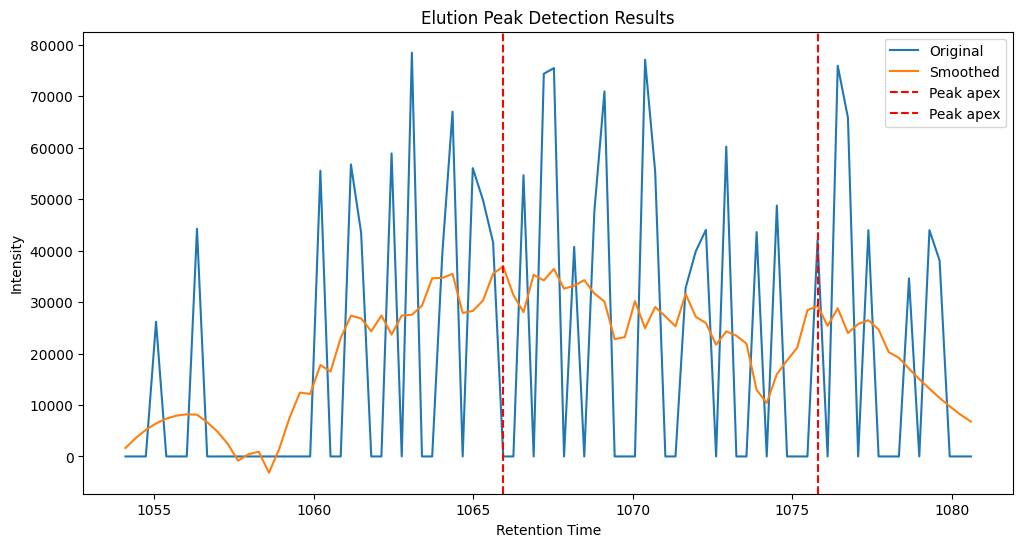

In [65]:

# Print the results
print(f"Number of detected peaks: {len(detected_peaks)}")
for i, peak in enumerate(detected_peaks, 1):
    print(f"\nPeak {i}:")
    print(f"Start RT: {peak['rt'].iloc[0]:.2f}")
    print(f"End RT: {peak['rt'].iloc[-1]:.2f}")
    print(f"Apex RT: {peak['smoothed_max_rt'].iloc[0]:.2f}")
    print(f"Apex intensity: {peak['smoothed_intensity'].max():.2f}")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(mt['rt'], mt['intensity'], label='Original')
plt.plot(mt['rt'], mt['smoothed_intensity'], label='Smoothed')

for peak in detected_peaks:
    plt.axvline(x=peak['smoothed_max_rt'].iloc[0], color='r', linestyle='--', label='Peak apex')

plt.xlabel('Retention Time')
plt.ylabel('Intensity')
plt.title('Elution Peak Detection Results')
plt.legend()
plt.show()

In [67]:
df = pd.read_csv("feature_matrix_with_entropy.csv")

In [68]:
df

feature_id  charge          RT           mz     RTstart  \
0     15442117177793273938       0    2.884946   100.003137    0.275567   
1     12830683088184381947       0   59.232511   100.039363   53.287756   
2     13264828442905664249       0  989.575800   100.904039  984.802560   
3     12680835294601837784       0  979.062180   100.904241  943.080240   
4      5715956394182736751       0  998.460600   100.906099  776.664540   
...                    ...     ...         ...          ...         ...   
7501  13604236055833466033       0  723.699360  1437.804774  721.928340   
7502  14418602174490107004       0   59.544765  1459.447702   56.108257   
7503  11340171020803744738       0   58.920511  1459.948574   55.795883   
7504    921404841096517827       0   58.920511  1460.449431   55.483632   
7505   1563772892460901741       0   59.857262  1497.395452   55.795883   

            RTend      MZstart        MZend   quality  intensity  \
0       36.282364   100.002914   100.003242  0.000061  471916.40   
1       77.247918   100.039154   100.039566  0.000016  120929.70   
2      993.070440   100.902847   100.904999  0.000006   43356.17   
3      984.165960   100.902817   100.905205  0.000005   37592.23   
4     1080.252420   100.905174   100.907028  0.000018  135651.60   
...           ...          ...          ...       ...        ...   
7501   727.897380  1437.786865  1437.824829  0.000004   27253.03   
7502    68.004156  1459.442261  1459.453247  0.000042  324815.60   
7503    68.004156  1459.938232  1459.955688  0.000029  223303.20   
7504    65.805270  1460.439087  1460.462769  0.000025  191107.30   
7505    62.670642  1497.390625  1497.398193  0.000019  149610.40   

      num_of_masstraces       FWHM  \
0                     1  35.004154   
1                     1  15.274867   
2                     1   8.267880   
3                     1  41.085720   
4                     1  36.644836   
...                 ...        ...   
7501                  1   5.969040   
7502                  1   7.542980   
7503                  1  10.730602   
7504                  1  10.321638   
7505                  1   6.874759   

                                               chrom_RT  \
0     0.275566974,0.6895669799999999,1.05356496,1.42...   
1     53.287755600000004,53.9178792,54.2316378,54.54...   
2     984.80256,985.12146,986.0766600000001,987.9869...   
3     943.08024,943.40016,944.36028,944.68062,945.98...   
4     776.66454,776.99328,777.97368,778.95906,780.63...   
...                                                 ...   
7501  721.92834,722.99322,723.69936,724.05036,724.75...   
7502  56.1082572,56.733637800000004,57.046134,57.358...   
7503  55.7958828,56.1082572,56.4210078,56.7336378000...   
7504  55.483632,55.7958828,56.733637800000004,57.046...   
7505  55.7958828,56.4210078,56.733637800000004,57.04...   

                                        chrom_intensity  \
0     353558.0,508494.53,446912.44,452386.03,419858....   
1     54958.05,83666.45,73090.266,70617.26,82217.2,8...   
2     40465.18,27249.219,22746.975,31935.889,55118.1...   
3     21494.09,31613.24,36039.883,30206.191,21463.64...   
4     13993.758,11871.68,13727.4,11118.821,14890.612...   
...                                                 ...   
7501  21012.44,16558.312,45543.67,15097.457,28823.49...   
7502  242192.45,211165.66,98296.06,144962.72,212659....   
7503  237845.19,135666.28,127189.81,177601.44,213939...   
7504  166590.19,204441.8,160933.55,142230.27,177095....   
7505  164068.19,129132.77,115564.15,108961.53,99708....   

                                                 EIC_RT  \
0     0.275566974,0.6895669799999999,1.05356496,1.42...   
1     44.5473708,44.8727466,45.2002482,45.526122,45....   
2     974.5781999999999,974.8983,975.2195399999999,9...   
3     964.28544,964.6077600000001,964.9279200000001,...   
4     983.52918,983.84706,984.16596,984.48444,984.80...   
...                                                 ...   
7501  708.

In [72]:
df_na = df[df["entropy"].isna()]

In [71]:
df_sub = df[df["entropy"].notna()]

In [73]:
df_na.to_csv("feature_matrix_with_entropy.na.csv", index=False)

In [75]:
df_sub.sort_values("entropy")

feature_id  charge           RT          mz     RTstart  \
4335  12001009644061132445       0   121.465098  285.909708  115.744716   
1726   4266424045232888116       0   114.627708  180.066539  112.004208   
6466  17125237201732272090       0    37.244990  454.704464   36.601115   
3311   2394140680972470722       0   238.743492  236.985109  236.977242   
6469   5441571915178207110       0    35.021614  454.928710   30.231363   
...                    ...     ...          ...         ...         ...   
7333   3784121047379915156       0   980.339820  743.634025  961.392180   
2809  15813308235956983276       0   944.360280  217.048282  919.448100   
3387  16563815916207011554       0  1030.267740  240.089787  992.115960   
6589  11585717381029460978       0   896.977440  470.784606  838.556640   
3972   2676414580041122284       0  1030.584360  267.100907  928.680720   

            RTend     MZstart       MZend   quality   intensity  \
4335   125.674596  285.909637  285.909790  0.000026   203361.00   
1726   135.760614  180.066391  180.066803  0.000111   853773.30   
6466    49.589251  454.703613  454.705261  0.000102   786929.50   
3311   244.699374  236.984436  236.985596  0.000004    29028.93   
6469    36.601115  454.928223  454.930023  0.000137  1057915.00   
...           ...         ...         ...       ...         ...   
7333   997.511580  743.631836  743.636536  0.000010    77871.67   
2809   995.927220  217.047684  217.049042  0.000008    60752.14   
3387  1036.616760  240.089264  240.090302  0.000024   188017.40   
6589   913.085340  470.781982  470.787415  0.000006    45239.36   
3972  1036.300020  267.099945  267.101776  0.000027   207080.30   

      num_of_masstraces       FWHM  \
4335                  1   8.424037   
1726                  1   3.203514   
6466                  1   2.478529   
3311                  1   5.573237   
6469                  1   2.120536   
...                 ...        ...   
7333                  1  28.663397   
2809                  1  39.337307   
3387                  1  27.351685   
6589                  1  46.399120   
3972                  1  22.446856   

                                               chrom_RT  \
4335  115.744716,116.118588,116.497962,116.878464000...   
1726  112.004208,112.37783400000001,112.758342,113.1...   
6466  36.6011148,36.92187,37.2449898,37.562745,37.87...   
3311  236.97724200000002,237.343488,237.700872,238.0...   
6469  30.231363,30.5524788,32.464482000000004,33.109...   
...                                                 ...   
7333  961.3921799999999,962.03466,962.6788799999999,...   
2809  919.4481,921.3568799999999,921.675,921.993,922...   
3387  992.11596,993.38772,993.7046999999999,995.2917...   
6589  838.55664,838.88436,839.5397399999999,839.8675...   
3972  928.68072,928.99938,929.3186400000001,929.9571...   

                                        chrom_intensity  \
4335  67988.72,86651.59,112583.93,116638.94,141552.1...   
1726  13984.269,33869.863,98592.89,233082.62,449889....   
6466  258758.7,625629.9,1314377.8,1310036.1,945133.0...   
3311  11291.842,21438.309,26475.432,22589.447,48581....   
6469  16762.324,32572.371,32532.887,54445.203,71083....   
...                                                 ...   
7333  33719.785,25908.594,44852.734,34111.426,35895....   
2809  28616.916,30771.256,28499.928,23949.568,30730....   
3387  70051.62,34467.703,61312.426,30244.35,49829.33...   
6589  23567.42,27071.94,26474.537,23328.916,15243.84...   
3972  38136.027,38698.23,31398.965,29650.996,29163.1...   

                                                 EIC_RT  \
4335  106.735326,107.10882600000001,107.484702,107.8...   
1726  99.71169599999999,100.077822,100.4427,100.8069...   
6466  22.5246,22.8947262,23.264847,23.6333532,24.000...   
3311  224.0976,224.474724,224.853474,225.233472,225....   
6469  20.3000922,20.669466,21.0415998,21.4120932,21....   
...                                                 ...   
7333  965.571180000000